# Кластеризация методом `K-means` для выделения групп объектов

В этой задаче будет рассмотрен метод кластеризации <code>K-means</code> для решения непосредственно задачи кластеризации — задачи выделения схожих структур в данных. Работать будем с известным набором данных <a href="http://yann.lecun.com/exdb/mnist/"><code>MNIST</code></a>.

Загрузим набор данных. Будем использовать только тестовую часть оригинального набора, чтобы сократить время обучения моделей.

In [ ]:
from keras.datasets import mnist
import warnings
warnings.filterwarnings("ignore")

(_,_), (X, y) = mnist.load_data()

Пример вывода нескольких объектов и соответствующих меток классов:

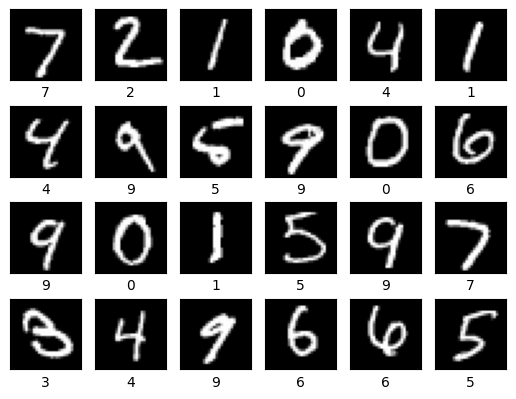

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(X[i], cmap='gray')
    axi.set(xticks=[], yticks=[])
    axi.set_xlabel(y[i],
                   color='black')

Введите <code>.shape</code> полученного набора данных

In [ ]:
# < ENTER YOUR CODE HERE >

При помощи <code>train_test_split</code> разобейте полученный набор данных на тренеровочную и тестовую выборки с параметрами, указанными в вашем варианте.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

Давайте, раз речь идет об известном наборе данных, заставим <code>K-means</code> искать $10$ групп объектов.

«Распрямите» изображения и обучите алгоритм <a href="https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html"><code>KMeans</code></a> с параметрами, указанными в вашем задании.

In [ ]:
X_train = X_train.reshape(X_train.shape[0], -1)
tsne = TSNE(n_components=2, init='random', random_state=41)
X_train = tsne.fit_transform(X_train)
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10, random_state=41)
kmeans.fit(X_train)

KMeans(n_clusters=10, random_state=41)

Определите чило элементов, отнесенных к кластеру, указанному в вашем задании

In [ ]:
cluster_labels = kmeans.labels_
count_cluster_9 = len(cluster_labels[cluster_labels == 9])
print("Число элементов, отнесенных к кластеру с меткой 9:", count_cluster_9)

Число элементов, отнесенных к кластеру с меткой 9: 804


Постройте изображения, соответствующие центроидам полученных кластеров. Для этого `reshape`ните координаты центроидов до размера $28 \times 28$ и постройте полученную матрицу, например, в черно-белых оттенках.



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Получите координаты центроидов
centroids = kmeans.cluster_centers_

# Верните координаты центроидов к размеру 28x28
centroid_images = centroids.reshape(10, 28, 28)

# Постройте изображения центроидов
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(centroid_images[i], cmap='gray')
    plt.title(f'Cluster {i}')
    plt.axis('off')

plt.show()

ValueError: ignored

## Можно заметить, что получившиеся картинки весьма походят на рукописные цифры. Впрочем, кластеризация прошла не без накладок. Предположите, какие цифры могут быть перепутаны и каких не хватает.

Так как получившиеся кластеры ничего не знают о природе кластеризумых объектов, метки кластеров могут отличаться от «разумных меток». Восстановите правильные метки, используя следующие соображения: кластеру присваивается метка тех цифр, представителей которых в кластере большинство. Действительно ли это помогло восстановить справедливость?

Введите полученные метки кластеров после преобразования и сравните с ранее построенными изображениями на основе центроидов. Подтверждаются ли ваши догадки фактами?

Предполагаемые метки кластеров (по большинству): [2 6 9 1 5 8 7 4 3 0]


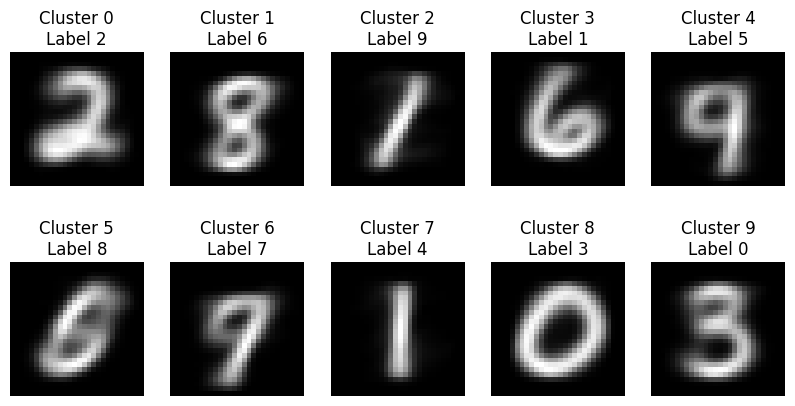

In [ ]:
# Получите предполагаемые метки кластеров на основе большинства
predicted_labels = np.zeros(10, dtype=int)

for i in range(10):
    cluster_indices = np.where(cluster_labels == i)[0]  # Индексы объектов в кластере i
    cluster_digit_counts = np.bincount(y_train[cluster_indices])  # Считаем количество цифр в кластере
    predicted_labels[i] = np.argmax(cluster_digit_counts)  # Назначаем метку кластеру

# Сравните предполагаемые метки с реальными метками
print("Предполагаемые метки кластеров (по большинству):", predicted_labels)

# Постройте изображения центроидов с новыми метками
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(centroid_images[i], cmap='gray')
    plt.title(f'Cluster {i}\nLabel {predicted_labels[i]}')
    plt.axis('off')

plt.show()

Разумно оценить что-то вроде точности. Считая, что все объекты кластера имеют ту же метку, что и сам кластер, сравните эти метки с истинными метками. Вычислите <code>accuracy</code>. Рекомендуем использовать функцию <a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html"><code>accuracy_score</code></a> из библиотеки <code>sklearn</code>.

In [ ]:
from sklearn.metrics import accuracy_score

# Сопоставьте предполагаемые метки с истинными метками
true_labels = np.zeros_like(cluster_labels)
for i in range(10):
    cluster_indices = np.where(cluster_labels == i)[0]
    true_labels[cluster_indices] = predicted_labels[i]

# Вычислите точность
accuracy = accuracy_score(y_train, true_labels)
print("Accuracy:", accuracy)

Accuracy: 0.838375


При помощи метода <code>.predict()</code> произведите кластеризацию тестовых данных. Переименуйте метки предсказанных кластеров на основе полученного для тренировочного набора данных преобразования.

In [ ]:
X_test = X_test.reshape(X_test.shape[0], -1)
test_cluster_labels = kmeans.predict(X_test)
test_predicted_labels = np.zeros_like(test_cluster_labels)
for i in range(10):
    cluster_indices = np.where(test_cluster_labels == i)[0]
    test_predicted_labels[cluster_indices] = predicted_labels[i]
from sklearn.metrics import accuracy_score

test_accuracy = accuracy_score(y_test, test_predicted_labels)
print("Accuracy on the test data:", test_accuracy)

Accuracy on the test data: 0.602


Постройте матрицу ошибок.

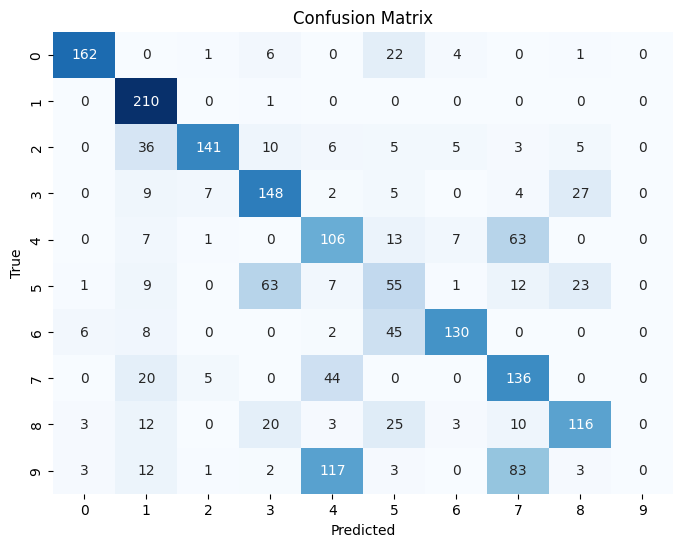

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Постройте матрицу ошибок
confusion = confusion_matrix(y_test, test_predicted_labels)

# Визуализируйте матрицу ошибок
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

С какой цифрой построенная модель чаще всего путала цифру, указанную в вашем варианте?

In [ ]:
4

Вычислите точность модели на тестовых данных.

In [ ]:
# < ENTER YOUR CODE HERE >

Интересно отметить, что мы построили классификатор на основе кластеризации при том, что никакими «правильными ответами» мы не пользовались (разве что для оценки).

А сколько кластеров кажется оптимальным количеством, если использовать каменистую осыпь? Постройте график каменистой осыпи для числа кластеров от $7$ до $16$. Можно ли уверенно определить оптимальное число кластеров?

In [ ]:
# < ENTER YOUR CODE HERE >

Все эти обучения черезчур уж долгие. Давайте сделаем «ход конем» и понизим размерность данных, пытаясь сохранять расстояния между объектами. Посмотрим, как это скажется на скорости и точности.

Преобразуйте <b>тренировочный набор</b> данных при помощи метода <a href="https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html"><code>TSNE</code></a> из библиотеки <code>sklearn</code>. Используйте параметры, указанные в вашем задании.

In [ ]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_train.shape

(8000, 784)

In [ ]:
y_train = y_train.reshape(y_train.shape[0], -1)
y_train.shape

(8000, 1)

In [ ]:
tsne = TSNE(n_components=2, init='random', random_state=41)
X_train_tsne = tsne.fit_transform(X_train)

In [ ]:
kmeans_tsne = KMeans(n_clusters=10, random_state=41)
kmeans_tsne.fit(X_train_tsne)

KMeans(n_clusters=10, random_state=41)

In [ ]:
y_train.shape

(8000, 1)

In [ ]:
cluster_labels = kmeans_tsne.labels_

In [ ]:
# Получите координаты центроидов
centroids = kmeans_tsne.cluster_centers_

In [ ]:
from sklearn.metrics import accuracy_score

# Сопоставьте предполагаемые метки с истинными метками
true_labels = np.zeros_like(cluster_labels)
for i in range(10):
    cluster_indices = np.where(cluster_labels == i)[0]
    true_labels[cluster_indices] = predicted_labels[i]

# Вычислите точность
accuracy = accuracy_score(y_train, true_labels)
print("Accuracy:", accuracy)

Accuracy: 0.18375


Проблема, однако, известна. `t-SNE` — метод, который не дает правила получения проекций многомерного пространства на, например, двумерное. Тем самым, при появлении новых данных, проекции придется искать заново.

В то же время, еще раз хочется подчеркнуть, как обучение без учителя позволило построить классификатор, который, как будто бы, является результатом решения задачи обучения с учителем.